In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# data setting

import pandas as pd

# 리스트 형식으로 원시 데이터를 저장
k10 = [
    [1, 13, 13, 3, 6, 3],
    [2, 13, 6, 6, 6, 8],
    [3, 11, 10, 6, 6, 8],
    [4, 13, 14, 8, 2, 7],
    [5, 8, 6, 5, 13, 5],
    [6, 18, 17, 14, 9, 6],
    [7, 18, 11, 8, 7, 4],
    [8, 13, 9, 6, 2, 3],
    [9, 10, 9, 5, 5, 2],
    [10, 13, 15, 5, 7, 1],
    [11, 14, 12, 8, 3, 3],
    [12, 13, 9, 6, 5, 4],
    [13, 16, 9, 2, 3, 3],
    [14, 13, 13, 8, 3, 7],
    [15, 12, 15, 14, 11, 5],
    [16, 19, 11, 3, 6, 3],
    [17, 11, 12, 14, 6, 5],
    [18, 11, 13, 15, 10, 7],
    [19, 9, 11, 9, 2, 4],
    [20, 15, 9, 9, 2, 4],
    [21, 10, 13, 6, 13, 2],
    [22, 12, 14, 16, 9, 5],
    [23, 16, 4, 2, 5, 5],
    [24, 15, 11, 8, 4, 1],
    [25, 10, 13, 5, 4, 8],
    [26, 11, 11, 12, 6, 3],
    [27, 8, 4, 4, 4, 2],
    [28, 13, 6, 9, 4, 3],
    [29, 12, 7, 4, 7, 8],
    [30, 8, 8, 8, 1, 7],
    [31, 10, 13, 12, 9, 3],
    [32, 16, 4, 5, 3, 3],
    [33, 10, 3, 7, 5, 4],
    [34, 18, 5, 7, 4, 6],
    [35, 10, 9, 12, 9, 5],
    [36, 12, 13, 11, 10, 4],
    [37, 10, 9, 5, 8, 4],
    [38, 15, 10, 9, 5, 10],
    [39, 6, 4, 10, 4, 5],
    [40, 13, 11, 8, 3, 4],
    [41, 12, 9, 10, 11, 3],
    [42, 8, 31, 36, 25, 26],
    [43, 14, 16, 10, 14, 3],
    [44, 9, 16, 8, 7, 9],
    [45, 13, 3, 5, 1, 6],
    [46, 10, 9, 3, 7, 4],
    [47, 13, 10, 4, 6, 1],
    [48, 14, 9, 8, 7, 3],
    [49, 16, 12, 3, 5, 2],
    [50, 16, 23, 11, 9, 9],
    [51, 18, 9, 4, 2, 2],
    [52, 19, 23, 18, 36, 14],
    [53, 15, 7, 5, 8, 6],
    [54, 10, 5, 6, 5, 4],
    [55, 23, 3, 6, 4, 3],
    [56, 15, 10, 5, 8, 5],
    [57, 15, 7, 5, 8, 3],
    [58, 17, 14, 3, 4, 5],
    [59, 18, 8, 5, 2, 7],
    [60, 11, 4, 4, 1, 1],
    [61, 10, 13, 8, 3, 4],
    [62, 14, 10, 7, 3, 3],
    [63, 14, 9, 13, 5, 2],
    [64, 17, 10, 7, 3, 4],
    [65, 19, 17, 6, 11, 10],
    [66, 10, 10, 13, 11, 7],
    [67, 13, 6, 4, 6, 3],
    [68, 6, 18, 21, 35, 30],
    [69, 12, 27, 31, 34, 24],
    [70, 6, 14, 13, 9, 4],
    [71, 13, 14, 11, 9, 5],
    [72, 12, 8, 5, 11, 7],
    [73, 16, 13, 8, 11, 9],
    [74, 6, 8, 14, 0, 8],
    [75, 13, 24, 39, 31, 30],
    [76, 12, 23, 27, 24, 24],
    [77, 16, 9, 17, 7, 5],
    [78, 8, 10, 8, 7, 6],
    [79, 10, 8, 11, 5, 6],
    [80, 12, 9, 7, 2, 7],
    [81, 17, 10, 10, 4, 4],
    [82, 13, 7, 4, 5, 0],
    [83, 8, 10, 11, 8, 9],
    [84, 16, 4, 7, 3, 3],
    [85, 14, 8, 4, 3, 4],
    [86, 10, 9, 9, 4, 2],
    [87, 17, 13, 5, 7, 8],
    [88, 16, 11, 5, 8, 6],
    [89, 8, 5, 4, 1, 3],
    [90, 14, 14, 5, 6, 6],
    [91, 16, 11, 6, 4, 5],
    [92, 13, 5, 6, 2, 5],
    [93, 13, 5, 8, 6, 11],
    [94, 11, 8, 6, 7, 5],
    [95, 14, 58, 101, 134, 186],
    [96, 8, 11, 2, 8, 5],
    [97, 8, 12, 16, 10, 6],
    [98, 10, 7, 7, 7, 4],
    [100, 8, 6, 3, 6, 5]
]

# DataFrame 생성
k_10 = pd.DataFrame(k10, columns=['Index', 'w_1_45', 'w_1_30', 'w_2_45', 'w_1_18', 'w_1_15'])

k15 = [
    [1, 18, 13, 3, 4],
    [2, 14, 8, 9, 3],
    [3, 14, 38, 37, 22],
    [4, 11, 9, 5, 4],
    [5, 8, 8, 6, 1],
    [6, 8, 19, 7, 19],
    [7, 6, 11, 8, 4],
    [8, 8, 11, 1, 5],
    [9, 12, 6, 10, 5],
    [10, 17, 8, 5, 5],
    [11, 10, 10, 8, 5],
    [12, 10, 16, 27, 25],
    [13, 9, 13, 5, 5],
    [14, 7, 17, 11, 4],
    [15, 15, 7, 3, 2],
    [16, 13, 24, 38, 33],
    [17, 14, 3, 6, 7],
    [18, 15, 17, 15, 5],
    [19, 13, 8, 12, 13],
    [20, 16, 4, 13, 6],
    [21, 8, 4, 6, 2],
    [22, 18, 16, 15, 7],
    [23, 20, 31, 38, 28],
    [24, 16, 11, 3, 0],
    [25, 14, 11, 13, 4],
    [26, 9, 22, 13, 8],
    [27, 14, 65, 213, 295],
    [28, 17, 10, 6, 4],
    [29, 8, 11, 13, 10],
    [30, 10, 14, 9, 7],
    [31, 6, 14, 1, 4],
    [32, 11, 6, 6, 1],
    [33, 13, 8, 10, 4],
    [34, 10, 12, 12, 8],
    [35, 7, 8, 6, 3],
    [36, 14, 24, 14, 7],
    [37, 13, 9, 4, 4],
    [38, 10, 5, 9, 3],
    [39, 11, 85, 208, 315],
    [40, 14, 6, 3, 3],
    [41, 10, 15, 11, 5],
    [42, 5, 9, 6, 4],
    [43, 17, 9, 3, 1],
    [44, 8, 9, 7, 6],
    [45, 15, 9, 7, 7],
    [46, 13, 11, 4, 5],
    [47, 12, 5, 9, 3],
    [48, 11, 5, 5, 5],
    [49, 12, 20, 16, 4],
    [50, 18, 18, 5, 5],
    [51, 6, 7, 5, 1],
    [52, 8, 7, 6, 8],
    [53, 17, 7, 1, 3],
    [54, 11, 11, 11, 0],
    [55, 10, 9, 5, 6],
    [56, 16, 39, 47, 35],
    [57, 15, 11, 9, 5],
    [58, 10, 11, 12, 14],
    [59, 12, 30, 22, 21],
    [60, 18, 11, 10, 6],
    [61, 15, 23, 38, 20],
    [62, 18, 8, 7, 1],
    [63, 21, 14, 6, 2],
    [64, 7, 5, 7, 9],
    [65, 10, 13, 12, 7],
    [66, 11, 15, 13, 5],
    [67, 11, 6, 9, 2],
    [68, 10, 7, 4, 3],
    [69, 4, 9, 6, 3],
    [70, 9, 4, 6, 3],
    [71, 13, 6, 5, 4],
    [72, 14, 73, 222, 304],
    [73, 13, 6, 3, 4],
    [74, 15, 8, 9, 4],
    [75, 16, 18, 13, 4],
    [76, 14, 13, 11, 11],
    [77, 11, 31, 51, 27],
    [78, 10, 28, 26, 21],
    [79, 13, 17, 12, 4],
    [80, 13, 11, 14, 3],
    [81, 14, 13, 3, 6],
    [82, 10, 9, 2, 4],
    [83, 16, 12, 7, 5],
    [84, 14, 5, 7, 7],
    [85, 13, 21, 17, 7],
    [86, 19, 80, 187, 315],
    [87, 9, 16, 12, 5],
    [88, 11, 12, 7, 6],
    [89, 14, 82, 196, 321],
    [90, 6, 9, 5, 4],
    [91, 17, 16, 10, 11],
    [92, 14, 30, 51, 32],
    [93, 18, 7, 4, 0],
    [94, 13, 14, 15, 3],
    [95, 10, 14, 8, 15],
    [96, 7, 9, 5, 4],
    [97, 10, 19, 12, 5],
    [98, 13, 18, 7, 9],
    [99, 11, 14, 6, 6],
    [100, 11, 13, 8, 3]
]

# DataFrame 생성
k_15 = pd.DataFrame(k15, columns=['Index', 'w_1_45', 'w_1_30', 'w_2_45', 'w_1_18'])


k20 = [
    [1, 14, 13, 11, 4, 6],
    [2, 13, 14, 11, 7, 6],
    [3, 9, 7, 19, 21, 23],
    [4, 12, 10, 8, 7, 3],
    [5, 13, 12, 11, 7, 2],
    [6, 7, 8, 17, 11, 6],
    [7, 10, 7, 7, 6, 5],
    [8, 3, 11, 27, 52, 61],
    [9, 26, 15, 9, 5, 2],
    [10, 10, 12, 18, 10, 10],
    [11, 12, 9, 15, 31, 24],
    [12, 9, 13, 16, 19, 27],
    [13, 7, 10, 20, 23, 24],
    [14, 7, 5, 21, 22, 24],
    [15, 9, 22, 18, 12, 7],
    [16, 12, 13, 5, 7, 4],
    [17, 22, 18, 8, 4, 9],
    [18, 16, 11, 12, 7, 7],
    [19, 7, 8, 19, 25, 18],
    [20, 14, 9, 10, 8, 6],
    [21, 11, 17, 14, 12, 7],
    [22, 17, 19, 6, 6, 4],
    [23, 10, 12, 17, 11, 4],
    [24, 12, 11, 8, 10, 13],
    [25, 10, 8, 10, 18, 17],
    [26, 14, 14, 24, 38, 65],
    [27, 9, 10, 14, 14, 24],
    [28, 27, 14, 5, 6, 5],
    [29, 15, 12, 3, 3, 6],
    [30, 16, 23, 14, 7, 7],
    [31, 7, 8, 10, 12, 9],
    [32, 8, 11, 29, 101, 277],
    [33, 13, 14, 8, 7, 5],
    [34, 13, 15, 12, 12, 15],
    [35, 8, 14, 21, 24, 22],
    [36, 10, 11, 8, 8, 4],
    [37, 7, 14, 11, 10, 7],
    [38, 13, 18, 9, 8, 15],
    [39, 8, 13, 18, 20, 15],
    [40, 18, 16, 6, 11, 6],
    [41, 16, 12, 9, 5, 5],
    [42, 15, 13, 8, 9, 2],
    [43, 14, 6, 13, 21, 17],
    [44, 6, 14, 21, 22, 25],
    [45, 7, 5, 13, 9, 7],
    [46, 10, 16, 8, 11, 10],
    [47, 7, 21, 16, 10, 7],
    [48, 12, 17, 9, 6, 7],
    [49, 11, 7, 18, 10, 13],
    [50, 8, 9, 22, 14, 18],
    [51, 11, 10, 14, 24, 16],
    [52, 15, 17, 12, 14, 5],
    [53, 11, 14, 12, 3, 6],
    [54, 14, 13, 13, 10, 5],
    [55, 8, 13, 23, 18, 24],
    [56, 12, 15, 14, 9, 12],
    [57, 9, 10, 10, 21, 26],
    [58, 17, 15, 14, 4, 5],
    [59, 15, 10, 9, 8, 15],
    [60, 13, 7, 19, 7, 7],
    [61, 10, 9, 14, 5, 6],
    [62, 17, 8, 8, 8, 5],
    [63, 15, 11, 13, 8, 2],
    [64, 10, 12, 22, 26, 21],
    [65, 8, 9, 8, 9, 8],
    [66, 10, 13, 11, 23, 25],
    [67, 21, 13, 9, 7, 7],
    [68, 11, 6, 12, 7, 8],
    [69, 7, 21, 19, 20, 21],
    [70, 4, 12, 16, 16, 22],
    [71, 8, 9, 28, 31, 60],
    [72, 13, 16, 9, 11, 7],
    [73, 15, 16, 8, 6, 7],
    [74, 9, 16, 29, 41, 62],
    [75, 13, 8, 15, 11, 9],
    [76, 6, 13, 11, 16, 10],
    [77, 8, 14, 5, 6, 5],
    [78, 10, 15, 11, 18, 15],
    [79, 17, 9, 9, 1, 2],
    [80, 19, 14, 8, 4, 4],
    [81, 17, 5, 10, 7, 7],
    [82, 15, 13, 9, 3, 6],
    [83, 24, 20, 6, 7, 5],
    [84, 21, 17, 11, 12, 11],
    [85, 16, 13, 9, 12, 5],
    [86, 10, 16, 6, 7, 5],
    [87, 5, 10, 23, 16, 20],
    [88, 10, 10, 8, 7, 7],
    [89, 14, 16, 12, 13, 11],
    [90, 8, 10, 16, 9, 4],
    [91, 32, 17, 5, 3, 2],
    [92, 6, 5, 12, 14, 17],
    [93, 12, 10, 13, 11, 11],
    [94, 17, 10, 8, 6, 7],
    [95, 8, 9, 16, 47, 55],
    [96, 10, 16, 8, 7, 4],
    [97, 11, 11, 10, 8, 11],
    [98, 4, 12, 20, 18, 19],
    [99, 27, 14, 14, 4, 4],
    [100, 12, 15, 9, 7, 4]
]


k_20 = pd.DataFrame(k20, columns=['Index', 'w_1_45', 'w_1_36', 'w_1_30', 'w_7_180', 'w_2_45'])


k_10 = k_10.drop("Index", axis = 1)
k_15 = k_15.drop("Index", axis = 1)
k_20 = k_20.drop("Index", axis = 1)


In [18]:
# basic statistics

print(np.mean(k_10, axis = 0))
print(np.mean(k_15, axis = 0))
print(np.mean(k_20, axis = 0))

w_1_45    12.696970
w_1_30    11.090909
w_2_45     9.717172
w_1_18     8.696970
w_1_15     7.828283
dtype: float64
w_1_45    12.23
w_1_30    16.03
w_2_45    20.75
w_1_18    22.47
dtype: float64
w_1_45     12.19
w_1_36     12.38
w_1_30     12.96
w_7_180    13.53
w_2_45     15.54
dtype: float64


In [19]:
print(np.var(k_10, axis = 0))
print(np.var(k_15, axis = 0))
print(np.var(k_20, axis = 0))


w_1_45     11.584940
w_1_30     48.183655
w_2_45    125.657382
w_1_18    205.746556
w_1_15    353.010917
dtype: float64
w_1_45      12.9971
w_1_30     249.6691
w_2_45    1898.4475
w_1_18    4407.8291
dtype: float64
w_1_45      27.0539
w_1_36      15.0356
w_1_30      32.4984
w_7_180    162.2691
w_2_45     857.3884
dtype: float64


array([[<Axes: title={'center': 'w_1_45'}>,
        <Axes: title={'center': 'w_1_36'}>,
        <Axes: title={'center': 'w_1_30'}>,
        <Axes: title={'center': 'w_7_180'}>,
        <Axes: title={'center': 'w_2_45'}>]], dtype=object)

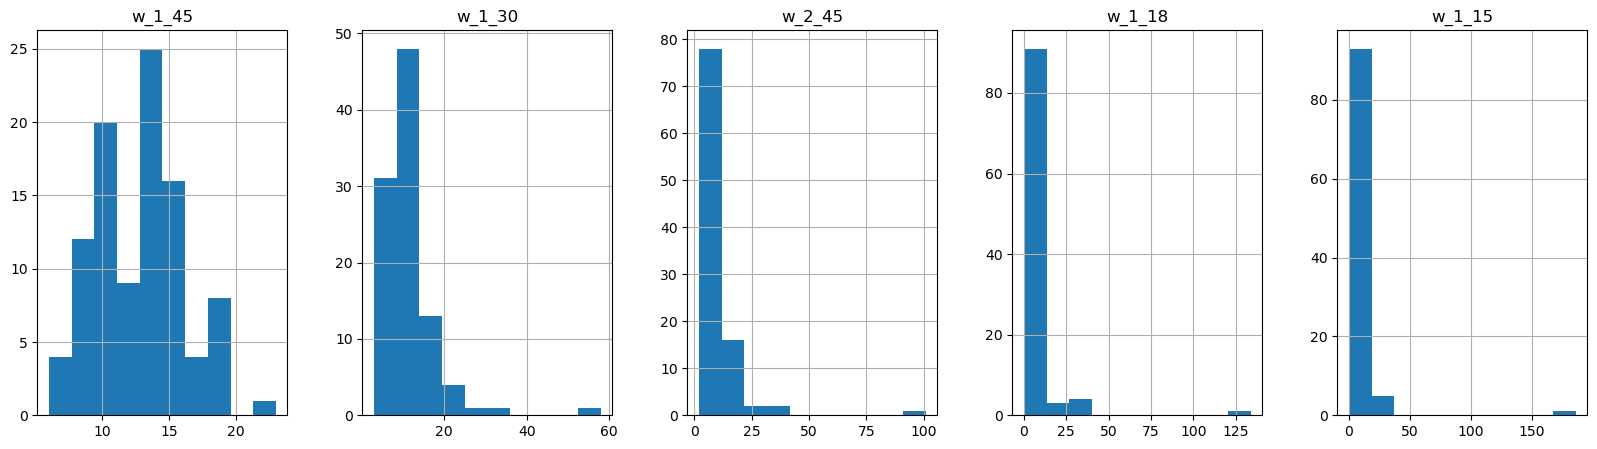

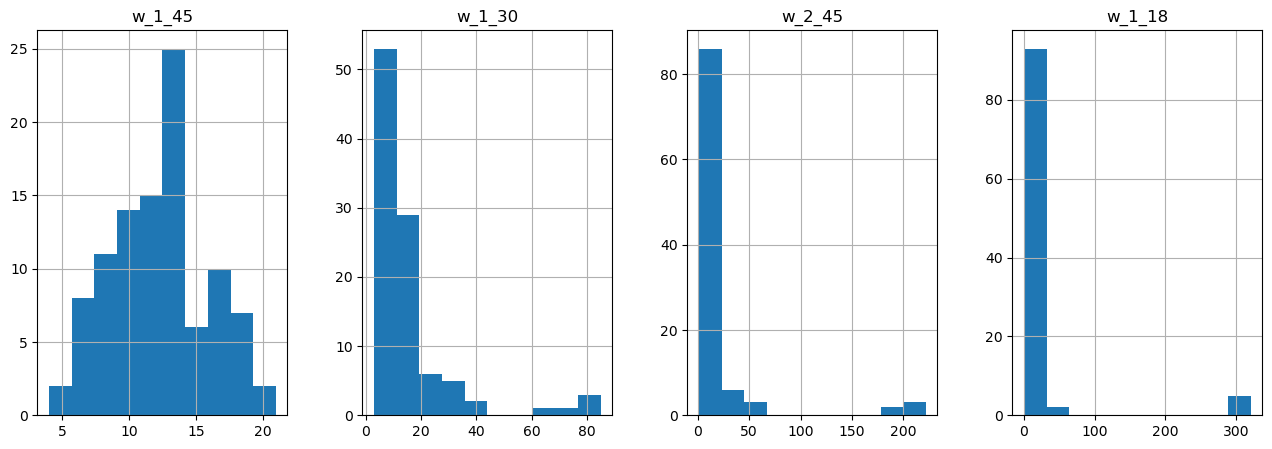

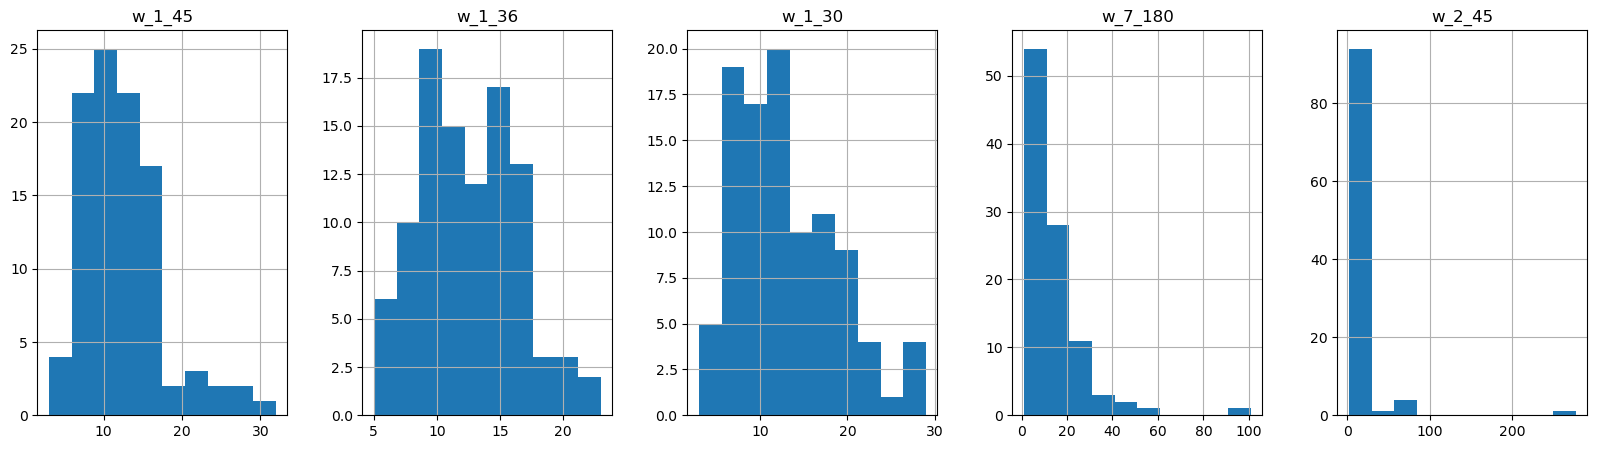

In [25]:
k_10.hist(bins=10, figsize=(20, 5), layout=(1, 5))
k_15.hist(bins=10, figsize=(20, 5), layout=(1, 5))
k_20.hist(bins=10, figsize=(20, 5), layout=(1, 5))



